In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import control

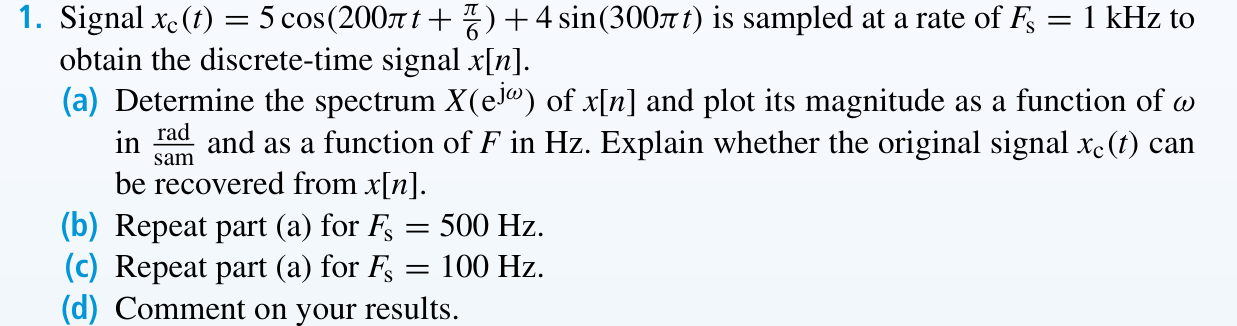

\begin{align*}
x_c(t) &= 5/2e^{j(200\pi t+ \pi/6)}+5/2e^{-j(200\pi t+ \pi/6)}
+4e^{j(300\pi t)}-4e^{-j(300\pi t)}\\
&= e^{j\pi/6}5e^{j(200\pi t)}+e^{j\pi/6}5e^{-j(200\pi t)}
+2e^{j(300\pi t)}-2e^{-j(300\pi t)}\\
\end{align*}

\begin{align*}
X_c(j \Omega)&=\int _{-\infty} ^{\infty} x_c(t)e^{-j\Omega t} dt\\
X_C(j\Omega)&=
\begin{cases}
\frac{5e^{j\pi/6}}{2}& \Omega = 200\pi\\
\frac{5e^{j\pi/6}}{2}& \Omega = -200\pi\\
\frac{2}{j} & \Omega = 300\pi\\
-\frac{2}{j} & \Omega = -300\pi\\
0 & \text{else}
\end{cases}

\end{align*}

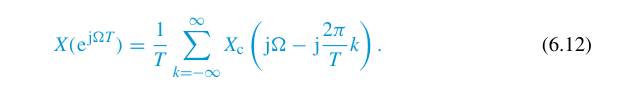

\begin{align*}
X(e^{j w T_s})&=1/T_s \sum _{k=- \infty} ^\infty X_c(j w -j \frac{2\pi}{T}k)\\
X(e^{j w 0.001})&=1000 \sum _{k=- \infty} ^\infty X_c(j w -j \frac{2\pi}{0.001}k)\\
\end{align*}

\begin{align*}
X(e^{j w T_s}) \rvert _{w=2 \pi FT}&=1/T_s \sum _{k=- \infty} ^{\infty} X_c(j2\pi  (F-kF_s ))\\
\end{align*}

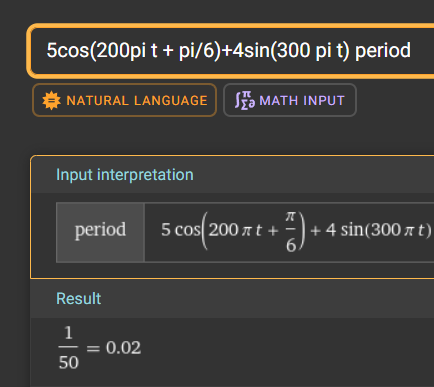

F_H=50
T=1/1000

# a)

\begin{align*}
T&\leq \frac{1}{2 F_H}\\
\frac{1}{1000} &\leq \frac{1}{2\cdot 50}\\
\frac{1}{1000} &\leq \frac{1}{100}\\
\end{align*}

# b)

\begin{align*}
T&\leq \frac{1}{2 F_H}\\
\frac{1}{500} &\leq \frac{1}{2\cdot 50}\\
\frac{1}{500} &\leq \frac{1}{100}\\
\end{align*}

# c)

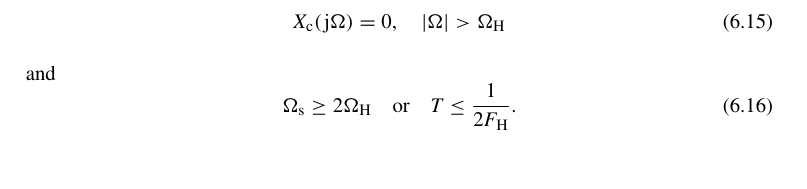

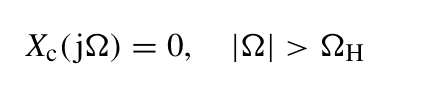

måske pga det ovenfor?

$$|200\pi|\ngtr 200\pi$$

\begin{align*}
T&\leq \frac{1}{2 F_H}\\
\frac{1}{100} &\leq \frac{1}{2\cdot 50}\\
\frac{1}{100} &\leq \frac{1}{100}\\
\end{align*}

0.001

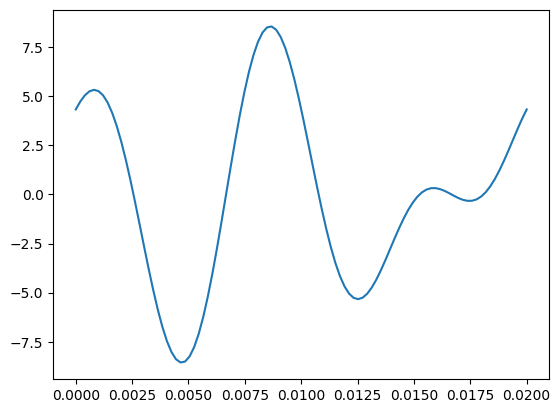

In [35]:
Fs=1000
n=10
t=np.linspace(0,0.02,100)
xc=5*np.cos(200*np.pi*t+np.pi/6)+4*np.sin(300*np.pi*t)
plt.plot(t,xc)

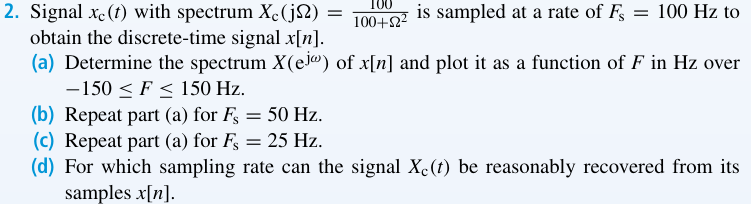

analytical solution for scrubs

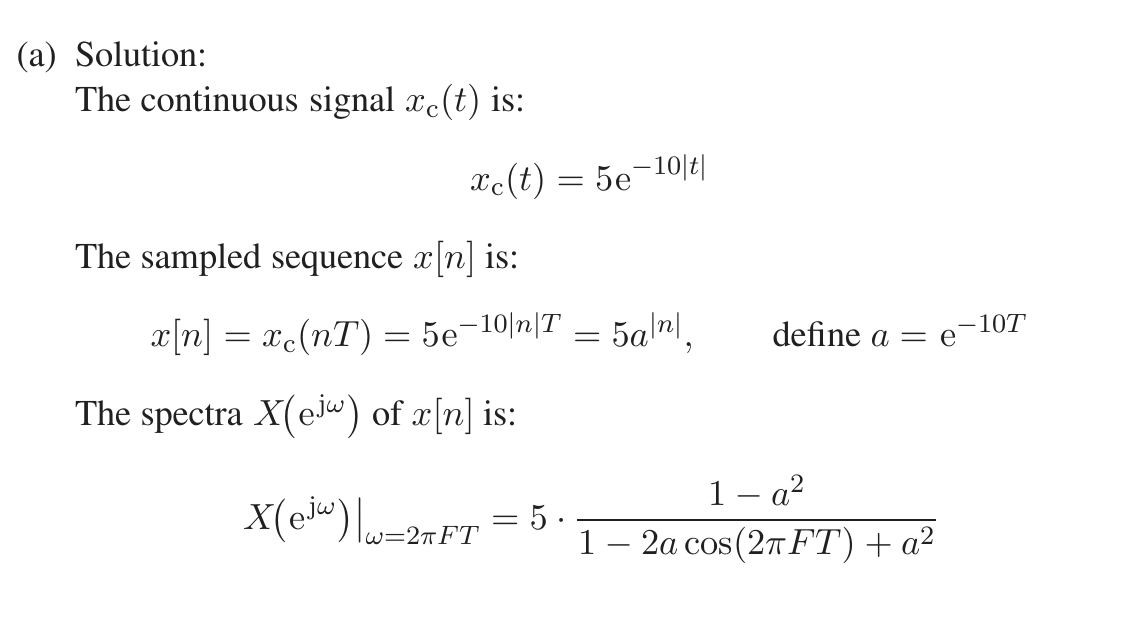

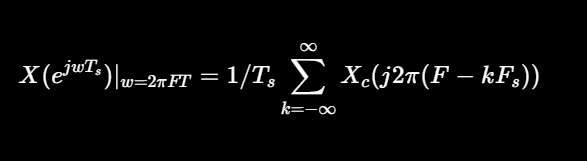

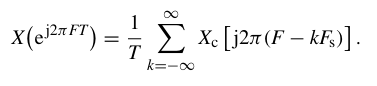

In [49]:
def ctH(omega):
    return 100/(100+(omega)**2)
def dtH(F,F_s):
    sum=0
    for i in range(-10,10):
        sum+=ctH(2*np.pi*(F-i*F_s))
    return F_s*sum


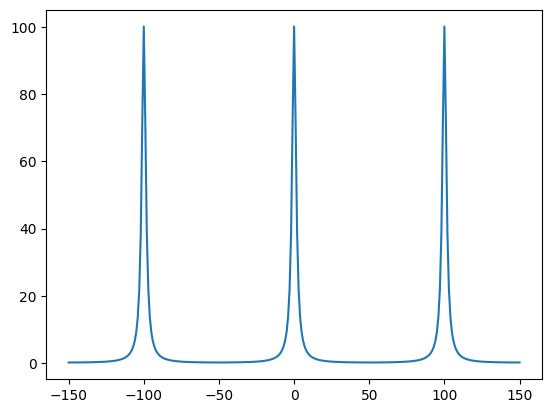

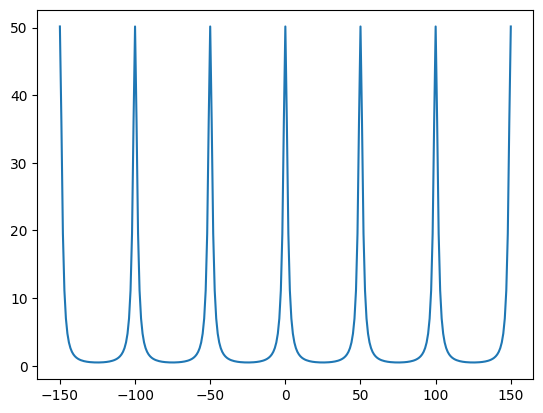

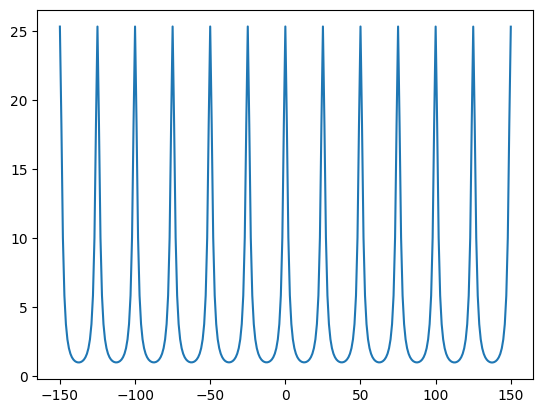

In [55]:
F=np.linspace(-150,150,301)
plt.plot(F,dtH(F,100))
plt.show()
plt.plot(F,dtH(F,50))
plt.show()
plt.plot(F,dtH(F,25))
plt.show()



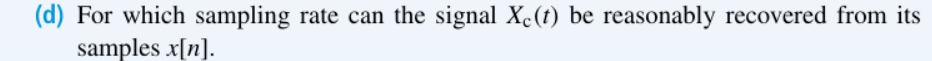

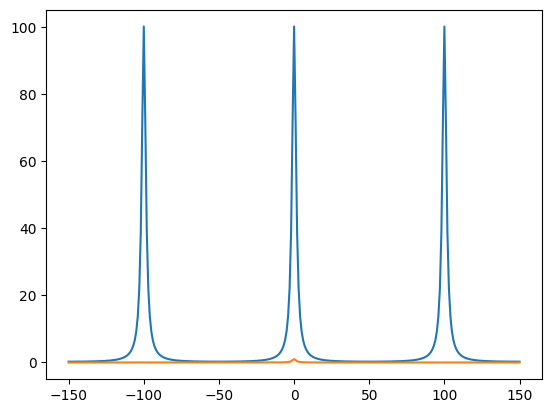

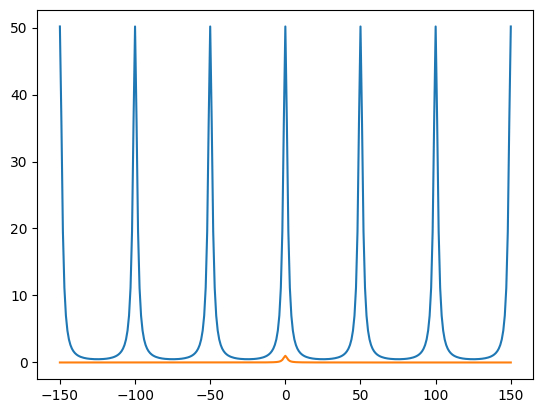

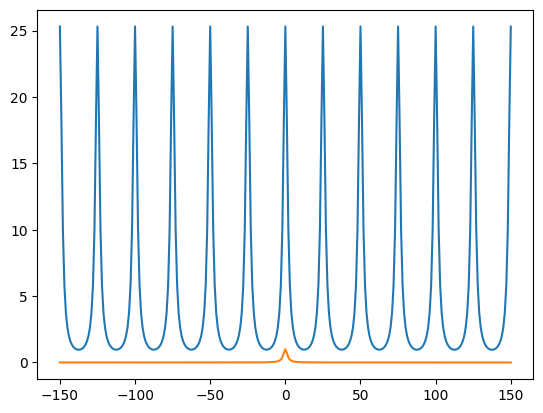

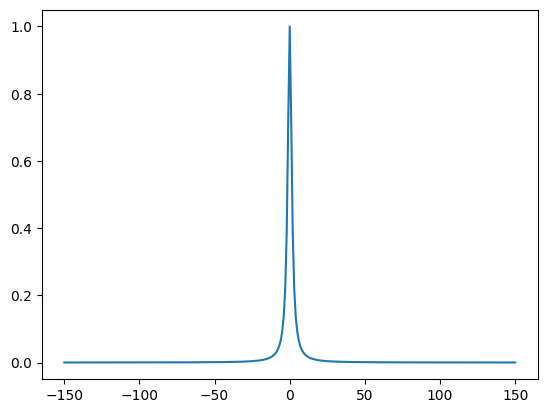

In [57]:
F=np.linspace(-150,150,301)
plt.plot(F,dtH(F,100))
plt.plot(F,ctH(2*np.pi*F))
plt.show()
plt.plot(F,dtH(F,50))
plt.plot(F,ctH(2*np.pi*F))
plt.show()
plt.plot(F,dtH(F,25))
plt.plot(F,ctH(2*np.pi*F))
plt.show()
plt.plot(F,ctH(2*np.pi*F))
plt.show()


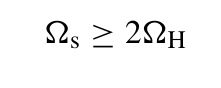

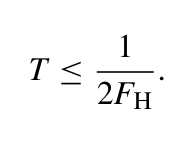

1/100<= 1/300

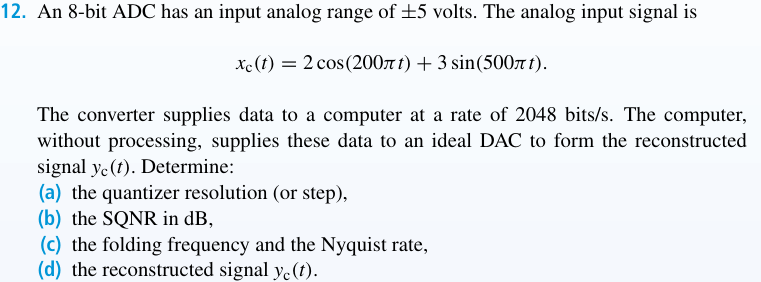

# a)

In [63]:
resolution=10/2**8 
resolution

0.0390625

i.e the smallest step that can be taken i $ 3.91... \cdot 10^{-3} V$

# b)

In [78]:
B=8
SQNR=(3/2)*2**(2*B)
10*np.log10(SQNR)

49.92571189679381

# c)

In [84]:
Fs=2048/8
foldfreq=Fs/2
foldfreq,Fs

(128.0, 256.0)

$$nyquist rate =2F_H $$

$$F_H=500\pi /2\pi$$
$$F_H=250Hz$$

In [90]:
FH=(500*np.pi)/(2*np.pi)
nyquist_rate=FH*2
nyquist_rate

499.99999999999994

# d)

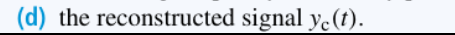

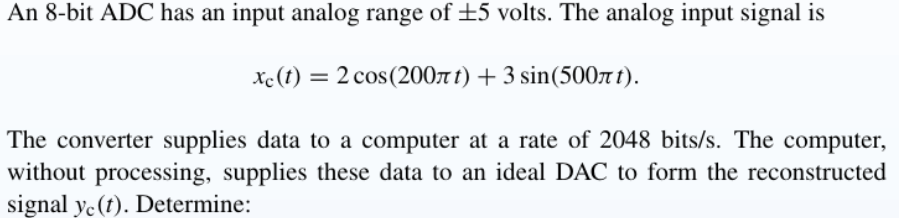

since the computer doesn't do any processing $y_c(t)=x_r(t)$, which for an ideal DAC is given as

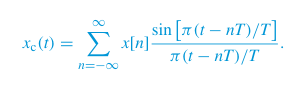

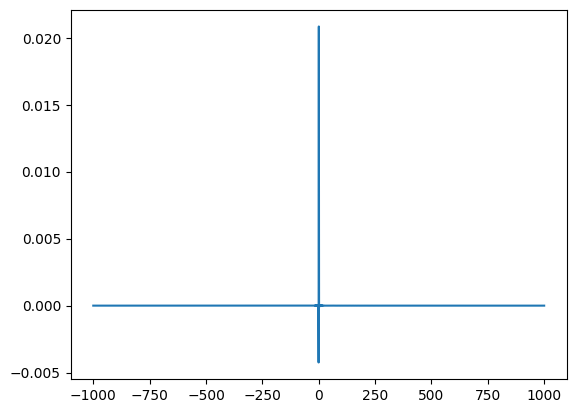

In [76]:
N=np.arange(-1000,1000)
T=np.linspace(-1000,1000,2000)
def xct(t):
    return 2*np.cos(200*np.pi*t)+3*np.sin(500*np.pi*t)
def xdt(n,Ts):
    return xct(n*Ts)
def yct(n,t,Ts):
    sum=0
    for i in range(n[0],n[-1]):
        sum+=xdt(i,Ts)*((np.sin(np.pi*(t-i*Ts)/Ts))/(np.pi*(t-i*Ts)/Ts))
    return sum
plt.plot(T,yct(N,T,1/2024))